In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.set_option('display.max_column', None)

pl=pd.read_csv('people.csv.zip')
ac=pd.read_csv('act_train.csv.zip')
pl['date']=pd.to_datetime(pl['date'])
ac['date']=pd.to_datetime(ac['date'])
pl_columns=[]
for col in pl.columns:
    if 'char' in col or 'date' in col:
        pl_columns.append('pl_' + col)
    else:
        pl_columns.append(col)
pl.columns=pl_columns
ac_columns=[]
for col in ac.columns:
    if 'char' in col or 'date' in col:
        ac_columns.append('act_' + col)
    else:
        ac_columns.append(col)
ac.columns=ac_columns
ac_pl_merge = pd.merge(ac, pl, on='people_id')

ac_pl_merge.head(10)

,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10,outcome,pl_char_1,group_1,pl_char_2,pl_date,pl_char_3,pl_char_4,pl_char_5,pl_char_6,pl_char_7,pl_char_8,pl_char_9,pl_char_10,pl_char_11,pl_char_12,pl_char_13,pl_char_14,pl_char_15,pl_char_16,pl_char_17,pl_char_18,pl_char_19,pl_char_20,pl_char_21,pl_char_22,pl_char_23,pl_char_24,pl_char_25,pl_char_26,pl_char_27,pl_char_28,pl_char_29,pl_char_30,pl_char_31,pl_char_32,pl_char_33,pl_char_34,pl_char_35,pl_char_36,pl_char_37,pl_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
5,ppl_100,act2_898576,2023-08-04,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1727,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
6,ppl_100002,act2_1233489,2022-11-23,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
7,ppl_100002,act2_1623405,2022-11-23,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
8,ppl_100003,act2_1111598,2023-02-07,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
9,ppl_100003,act2_1177453,2023-06-28,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99


In [2]:
# # ac.head(20)
# pl.char_38.unique()
# pl.char_38.min() , pl.char_38.max(), pl.char_38.mean(), pl.char_38.median()

ac_pl_merge.columns
ac_pl_merge.groupby(['outcome' ])[ 'pl_char_10','pl_char_11', 'pl_char_12', 'pl_char_13',
       'pl_char_14', 'pl_char_15', 'pl_char_16', 'pl_char_17', 'pl_char_18',
       'pl_char_19', 'pl_char_20', 'pl_char_21', 'pl_char_22', 'pl_char_23',
       'pl_char_24', 'pl_char_25', 'pl_char_26', 'pl_char_27', 'pl_char_28',
       'pl_char_29', 'pl_char_30', 'pl_char_31', 'pl_char_32', 'pl_char_33',
       'pl_char_34', 'pl_char_35', 'pl_char_36', 'pl_char_37', 'pl_char_38'].count()

,pl_char_10,pl_char_11,pl_char_12,pl_char_13,pl_char_14,pl_char_15,pl_char_16,pl_char_17,pl_char_18,pl_char_19,pl_char_20,pl_char_21,pl_char_22,pl_char_23,pl_char_24,pl_char_25,pl_char_26,pl_char_27,pl_char_28,pl_char_29,pl_char_30,pl_char_31,pl_char_32,pl_char_33,pl_char_34,pl_char_35,pl_char_36,pl_char_37,pl_char_38
outcome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794
1,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497


In [3]:
# ac.loc[ac.people_id == 'ppl_100']
# pl.group_1.nunique()
ac_pl_merge.pl_char_19.value_counts()
ac_pl_merge.groupby(['pl_char_11'])[ 'outcome'].count()

pl_char_11
False    1743501
True      453790
Name: outcome, dtype: int64

In [4]:
ac_pl_merge.shape

(2197291, 55)

In [5]:
ac_pl_merge.act_char_10.notnull().sum()
ac_pl_merge.groupby('outcome')['act_char_10'].count()

outcome
0    1129010
1     910666
Name: act_char_10, dtype: int64

In [6]:
ac_pl_merge.act_char_10.value_counts()

type 1       904683
type 23      200408
type 2       116191
type 61       35417
type 452      23513
              ...  
type 3682         1
type 2775         1
type 3915         1
type 7102         1
type 2043         1
Name: act_char_10, Length: 6515, dtype: int64

False    1621615
True      575676
Name: pl_char_15, dtype: int64

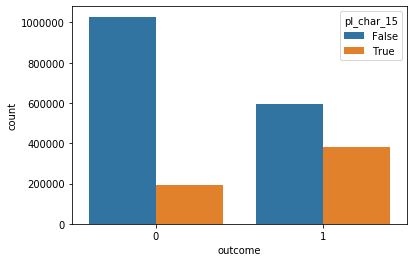

In [7]:
# pl.info()
# pl.char_38.unique()
# ac.columns
# ac.info()
ac_pl_merge.pl_char_11.value_counts()
# sns.countplot('pl_char_10', data=ac_pl_merge, hue='outcome') ,
# sns.countplot('pl_char_37', data=ac_pl_merge, hue='outcome')
sns.countplot('outcome', data=ac_pl_merge, hue='pl_char_15')

ac_pl_merge.pl_char_15.value_counts()

More False answer between pl_char_10 and pl_char_38 lead to more negative value. Contrarily, more postive answer lead to more positive business value. 

In [8]:
ac.activity_category.unique()
ac.outcome.unique()
ac.act_date.max(), ac.act_date.min(), pl.pl_date.max(), pl.pl_date.min()
# ac.columns
# ac.act_date.head()

(Timestamp('2023-08-31 00:00:00'),
 Timestamp('2022-07-17 00:00:00'),
 Timestamp('2023-08-31 00:00:00'),
 Timestamp('2020-05-18 00:00:00'))

Text(0.5, 1.0, 'Char_38')

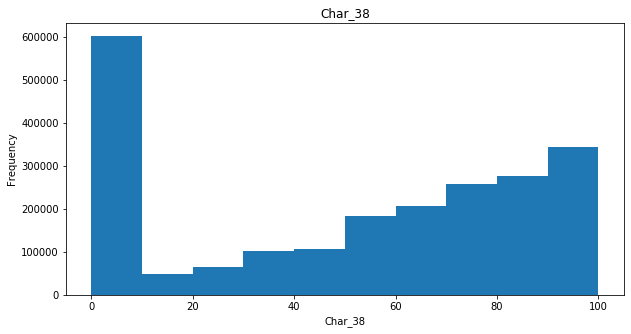

In [19]:
ac_pl_merge.pl_char_38.plot(kind='hist',figsize=(10,5))
plt.xlabel('Char_38')
plt.ylabel('Frequency')
plt.title('Char_38')

(array([587161.,  49644.,  65930., 101104.,  88821.,  66710.,  71624.,
         71876.,  54474.,  64450.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

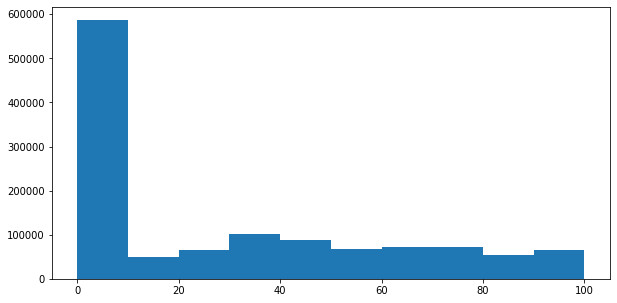

In [20]:
pl.columns
# pl_char_38=pl[['people_id', 'char_38']]
# ac_outcome=ac[['people_id', 'outcome']]
# ac_pl_38_outcome_df=pl_char_38.merge(ac_outcome, how='left', on='people_id')
ac_pl_merge_38_outcome_0 = ac_pl_merge[ac_pl_merge['outcome'] == 0]
plt.figure(figsize=(10,5))
plt.hist(ac_pl_merge_38_outcome_0['pl_char_38'])
# ac_pl_38_outcome_df_0.describe()

(array([1.50320e+04, 1.60000e+01, 0.00000e+00, 1.88000e+03, 1.79420e+04,
        1.16920e+05, 1.34997e+05, 1.87124e+05, 2.21615e+05, 2.79971e+05]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

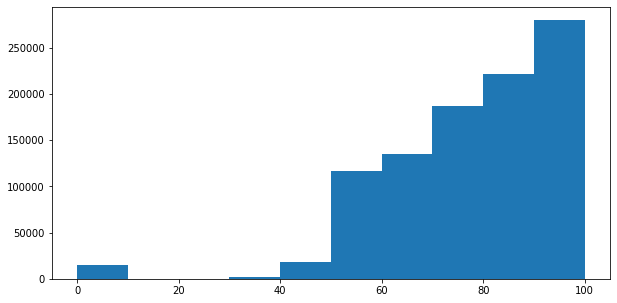

In [21]:
ac_pl_merge_38_outcome_1 = ac_pl_merge[ac_pl_merge['outcome'] == 1]
plt.figure(figsize=(10,5))
plt.hist(ac_pl_merge_38_outcome_1['pl_char_38'])
# ac_pl_38_outcome_df_1.describe()

In [ ]:
# ac.memory_usage()

In [ ]:
# pl.columns

In [ ]:
# ac.columns

In [ ]:
# ac.describe()
# ac.outcome.isnull().sum()
# for i in ac.columns:
#     i.isnull().sum()
# ac.isnull().sum() , ac.shape
# ac.shape[0] - ac.outcome.notnull().sum()
# ac.shape[0] - ac.char_1.isnull().sum()

In [ ]:
# for i in ac.columns:
#     ac.columns[i],ac.shape[0] - ac[i].isnull().sum()
# ac.outcome.value_counts().plot(kind='bar')

In [ ]:
for i in ac_pl_merge:
    print('Unique Elements: ', i,":",ac_pl_merge[i].nunique())
# ac.char_1.unique()

In [ ]:
# for i in pl:
#     print('Unique Elements: ', i,":",pl[i].nunique())

In [ ]:
for i in ac_pl_merge:
    print('No. of Null', i,":",ac_pl_merge[i].isnull().sum())

In [ ]:
# for i in pl:
#     print('No. of Null', i,pl[i].isnull().sum())    #All good, no missing values

In [ ]:
# ac.activity_category.unique()
# ac.char_1.value_counts()
# ac.columns

In [22]:
ac_pl_merge.groupby('outcome')['act_char_1','act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
       'act_char_9', 'act_char_10'].count()

,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10
outcome,,,,,,,,,,
0,92784,92784,92784,92784,92784,92784,92784,92784,92784,1129010
1,64831,64831,64831,64831,64831,64831,64831,64831,64831,910666


In [23]:
ac_pl_merge.groupby(['outcome','activity_category'])['act_char_1','act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
       'act_char_9', 'act_char_10'].count()

act_char_1  act_char_2  act_char_3  act_char_4  \
outcome activity_category                                                   
0       type 1                  92784       92784       92784       92784   
        type 2                      0           0           0           0   
        type 3                      0           0           0           0   
        type 4                      0           0           0           0   
        type 5                      0           0           0           0   
        type 6                      0           0           0           0   
        type 7                      0           0           0           0   
1       type 1                  64831       64831       64831       64831   
        type 2                      0           0           0           0   
        type 3                      0           0           0           0   
        type 4                      0           0           0           0   
        type 5                      0           0           0           0   
        type 6                      0           0           0           0   
        type 7                      0           0           0           0   

                           act_char_5  act_char_6  act_char_7  act_char_8  \
outcome activity_category                                                   
0       type 1                  92784       92784       92784       92784   
        type 2                      0           0           0           0   
        type 3                      0           0           0           0   
        type 4                      0           0           0           0   
        type 5                      0           0           0           0   
        type 6                      0           0           0           0   
        type 7                      0           0           0           0   
1       type 1                  64831       64831       64831       64831   
        type 2                      0           0           0           0   
        type 3                      0           0           0           0   
        type 4                      0           0           0           0   
        type 5                      0           0           0           0   
        type 6                      0           0           0           0   
        type 7                      0           0           0           0   

                           act_char_9  act_char_10  
outcome activity_category                           
0       type 1                  92784            0  
        type 2                      0       443002  
        type 3                      0       321202  
        type 4                      0       105972  
        type 5                      0       255050  
        type 6                      0         1889  
        type 7                      0         1895  
1       type 1                  64831            0  
        type 2                      0       461681  
        type 3                      0       108206  
        type 4                      0       101493  
        type 5                      0       235660  
        type 6                      0         2364  
        type 7                      0         1262

In [13]:
ac_pl_merge_perc = ac_pl_merge.groupby(['activity_category','outcome'])['act_char_1','act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
       'act_char_9', 'act_char_10'].count().reset_index()
ac_pl_merge_perc['act_total'] = ac_pl_merge_perc['act_char_9'] + ac_pl_merge_perc['act_char_10']
ac_pl_merge_perc

,activity_category,outcome,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10,act_total
0,type 1,0,92784,92784,92784,92784,92784,92784,92784,92784,92784,0,92784
1,type 1,1,64831,64831,64831,64831,64831,64831,64831,64831,64831,0,64831
2,type 2,0,0,0,0,0,0,0,0,0,0,443002,443002
3,type 2,1,0,0,0,0,0,0,0,0,0,461681,461681
4,type 3,0,0,0,0,0,0,0,0,0,0,321202,321202
5,type 3,1,0,0,0,0,0,0,0,0,0,108206,108206
6,type 4,0,0,0,0,0,0,0,0,0,0,105972,105972
7,type 4,1,0,0,0,0,0,0,0,0,0,101493,101493
8,type 5,0,0,0,0,0,0,0,0,0,0,255050,255050
9,type 5,1,0,0,0,0,0,0,0,0,0,235660,235660


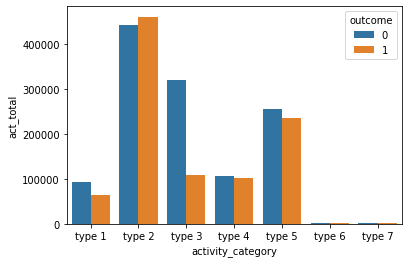

In [17]:
sns.barplot('activity_category', 'act_total', data=ac_pl_merge_perc, ci=False, hue='outcome')

In [10]:
ac_pl_merge_perc = ac_pl_merge.groupby(['activity_category','outcome'])['act_char_9', 'act_char_10'].count().reset_index()
ac_pl_merge_perc[]

,activity_category,outcome,act_char_9,act_char_10
0,type 1,0,92784,0
1,type 1,1,64831,0
2,type 2,0,0,443002
3,type 2,1,0,461681
4,type 3,0,0,321202
5,type 3,1,0,108206
6,type 4,0,0,105972
7,type 4,1,0,101493
8,type 5,0,0,255050
9,type 5,1,0,235660


In [ ]:
# ac_pl_merge_perc['percentage'] = ac_pl_merge_perc
new_col=[]
if 

In [ ]:
ac_pl_merge.outcome.value_counts()

In [24]:
type_outcome = ac_pl_merge.groupby(['activity_category','outcome'])['people_id'].count().reset_index()
type_outcome.columns=['activity_category','outcome','count']
type_outcome

,activity_category,outcome,count
0,type 1,0,92784
1,type 1,1,64831
2,type 2,0,443002
3,type 2,1,461681
4,type 3,0,321202
5,type 3,1,108206
6,type 4,0,105972
7,type 4,1,101493
8,type 5,0,255050
9,type 5,1,235660


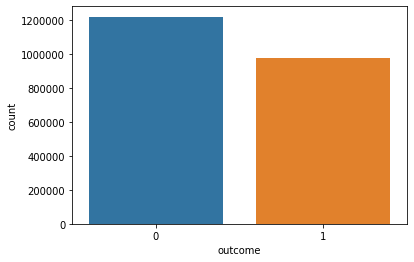

In [48]:
sns.countplot('outcome', data=ac_pl_merge)

H0: There is no difference in the mean of pl_char_38 with respect to  postive outcomes(business value) and no outcome 
H1: There is a difference in  the mean of pl_char_38 with respec to  postive outcomes(business value) and no outcome (Claim)

In [50]:
ac_pl_merge_0 = ac_pl_merge['outcome'] == 0
ac_pl_merge_1 = ac_pl_merge['outcome'] == 1
ac_pl_merge[ac_pl_merge_1].columns
stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['pl_char_38'], ac_pl_merge[ac_pl_merge_1]['pl_char_38'], equal_var=False)

Ttest_indResult(statistic=-1446.7458801234332, pvalue=0.0)

Decision: There is enough evidance to reject the null hypothesis, that 

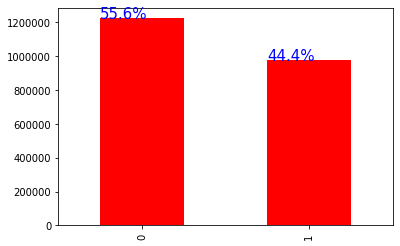

In [25]:
ax=ac_pl_merge.outcome.value_counts().plot(kind='bar', color='red')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()-.0, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='blue')

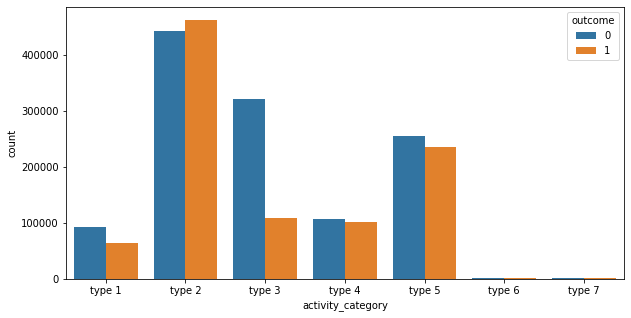

In [26]:
# ac.groupby(['activity_category','outcome'])['people_id'].count().reset_index().plot(kind='bar', stacked=True)
# ac.groupby(['activity_category'])['outcome'].count().reset_index().plot(kind='bar')
plt.figure(figsize=(10,5))
sns.barplot('activity_category', 'count', data=type_outcome, ci=False, hue='outcome')

Type2 and type5 activities have higher probablity to give a positive outcome(business value) compared to remaining five activities. However, type3 activity has the highest probablity of giving a negative outcome(business value). 

In [34]:
ac_pl_merge['activity_category'].value_counts()
ac_pl_merge_type2 = ac_pl_merge[ac_pl_merge['activity_category'] == 'type 2']
ac_pl_merge_type2.outcome.value_counts()

1    461681
0    443002
Name: outcome, dtype: int64

In [ ]:
ac_pl_merge_type2.outcome.plot(kind='bar')

In [ ]:
# plt.figure(figsize=(10,5))
# sns.countplot('activity_category', data=ac_pl_merge, hue='outcome')

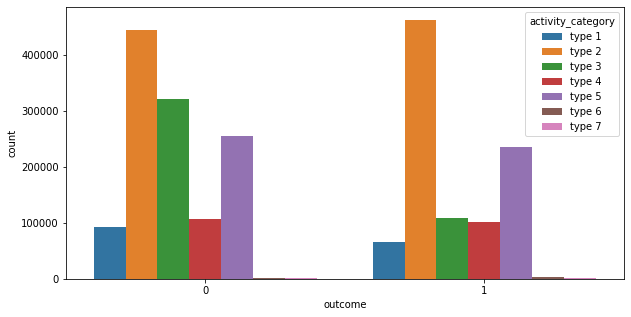

In [35]:
# sns.barplot('activity_category', 'people_id', data=type_outcome, ci=False,  hue='outcome',stacked=True)
# type_outcome.plot(kind='bar', stacked=True)
plt.figure(figsize=(10,5))
sns.barplot('outcome', 'count', data=type_outcome, ci=False, hue='activity_category')

In [ ]:
ac_pl_merge.groupby(['activity_category','outcome'])['act_char_1',
       'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
       'act_char_9', 'act_char_10'].count()

In [ ]:
pl.head(1)

In [ ]:
# ac[ac.people_id.value_counts().head(32).reset_index()['index']]
repeated_customer=ac_pl_merge.people_id.value_counts().head(500).reset_index()
# ac.loc[ac.people_id == ac[ac.people_id.value_counts().head(32).reset_index()['index']]]
# mask1= ac[ac['people_id'] == ac.people_id.value_counts().head(32).reset_index().head(1)['index']]
# ac.loc[ac.people_id == ac.people_id.value_counts().head(32).reset_index().head(1)['index'],:]
repeated_customer.people_id.sum()
# for i in mask:
#     if i in ac['people_id']:
#         print(ac[i])
ac_pl_merge.loc[ac_pl_merge.people_id == "ppl_247868",]['outcome'].value_counts()

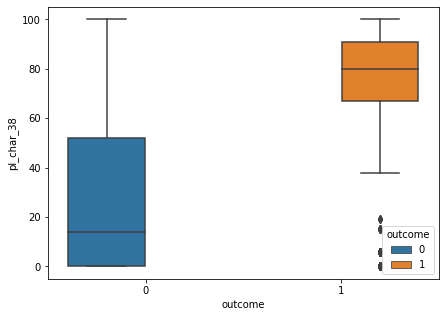

In [36]:
plt.figure(figsize=(7,5))
sns.boxplot('outcome', 'pl_char_38', data=ac_pl_merge, hue='outcome', orient='v')

In [ ]:
import statsmodels.api as sm 
sm.qqplot(ac_pl_merge['pl_char_38']) 


In [ ]:
customer_count = ac_pl_merge.people_id.value_counts().reset_index()
customer_count.columns=['cust_id', 'No_act']
customer_count.shape[0]
one_time_customer = customer_count[customer_count['No_act'] < 2].count()
repeated_customer = customer_count[customer_count['No_act'] > 1].count()
one_time_customer, repeated_customer

In [ ]:
# pl_month_count = ac_pl_merge.pl_date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
# pl_month_count.columns=['month', 'count']
# sns.barplot('month', 'count', data=pl_month_count)

In [ ]:
# ac_month_count = ac_pl_merge.act_date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
# ac_month_count.columns=['month', 'count']
# sns.barplot('month', 'count', data=ac_month_count)

In [39]:
df_outcome_1=ac_pl_merge[ac_pl_merge['outcome'] == 1]
df_outcome_1.shape
df_outcome_0=ac_pl_merge[ac_pl_merge['outcome'] == 0]
df_outcome_0.shape


(1221794, 55)

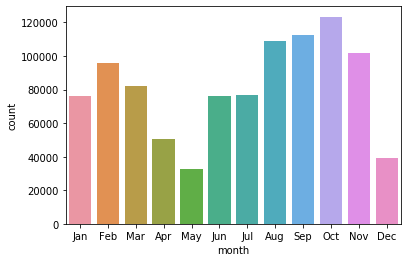

In [42]:
df_outcome_1_month_count = df_outcome_1.act_date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
df_outcome_1_month_count.columns=['month', 'count']
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
              7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df_outcome_1_month_count.month = df_outcome_1_month_count.month.replace(month_map)
sns.barplot('month', 'count', data=df_outcome_1_month_count)

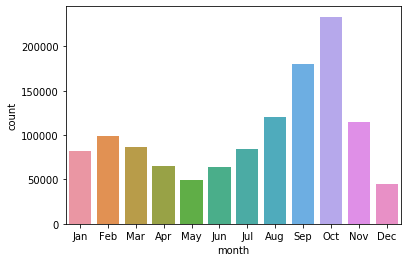

In [43]:
df_outcome_0_month_count = df_outcome_0.act_date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
df_outcome_0_month_count.columns=['month', 'count']
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
              7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df_outcome_0_month_count.month = df_outcome_0_month_count.month.replace(month_map)
sns.barplot('month', 'count', data=df_outcome_0_month_count)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

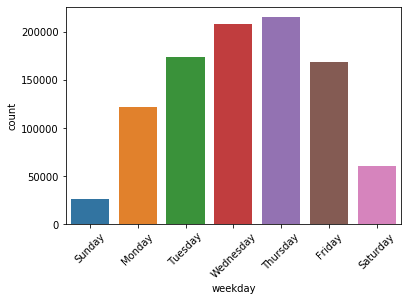

In [41]:
df_outcome_1_weekday_count = df_outcome_1.act_date.dt.weekday.value_counts().sort_values().reset_index().sort_values('index') # Sunday is 0.
df_outcome_1_weekday_count.columns=['weekday', 'count']
# df_outcome_1_weekday_count.weekday.replace(0,'Monday')
weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
df_outcome_1_weekday_count.weekday = df_outcome_1_weekday_count.weekday.replace(weekday_map)

sns.barplot('weekday', 'count', data=df_outcome_1_weekday_count)
plt.xticks(rotation = 45)
# df_outcome_1_weekday_count

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

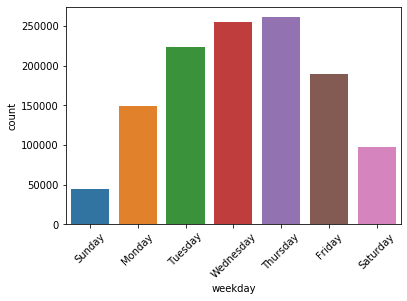

In [44]:
df_outcome_0_weekday_count = df_outcome_0.act_date.dt.weekday.value_counts().sort_values().reset_index().sort_values('index') # Sunday is 0.
df_outcome_0_weekday_count.columns=['weekday', 'count']
# df_outcome_1_weekday_count.weekday.replace(0,'Monday')
weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
df_outcome_0_weekday_count.weekday = df_outcome_0_weekday_count.weekday.replace(weekday_map)

sns.barplot('weekday', 'count', data=df_outcome_0_weekday_count)
plt.xticks(rotation = 45)

In [ ]:
# ac.groupby(['activity_category','outcome']).count()
ac_pl_merge.pl_date.dt.year.value_counts().sort_values()
# pl.date.dt.year.value_counts().sort_values().plot(kind='bar')
ac_pl_merge.outcome.value_counts()

Text(0.5, 1.0, 'Activities Count by Year')

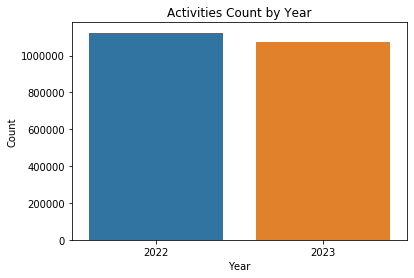

In [45]:
# ac.groupby(['outcome'])['char_1',
#        'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
# #        'char_9', 'char_10'].count().plot(kind='bar', stacked=True)
# ac.date.dt.year.value_counts().reset_index().plot(kind='bar')
ac_date_year=ac_pl_merge.act_date.dt.year.value_counts().reset_index()
sns.barplot('index', 'act_date',data=ac_date_year)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Activities Count by Year')

Text(0.5, 1.0, 'Activities Count by Year')

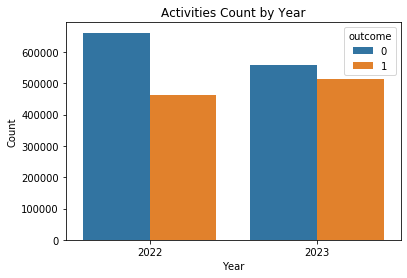

In [46]:
# ac_date_year=ac.date.dt.year.value_counts().reset_index()
sns.countplot(ac_pl_merge['act_date'].dt.year, data=ac_pl_merge, hue='outcome')
# sns.barplot('index', 'date',data=ac_date_year)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Activities Count by Year')

In [54]:
ac_pl_merge_2022 = ac_pl_merge[ac_pl_merge['act_date'].dt.year == 2022]  
ac_pl_merge_2023 = ac_pl_merge[ac_pl_merge['act_date'].dt.year == 2023]  
stats.ttest_ind(ac_pl_merge_2022[ac_pl_merge_2022['outcome'] == 1]['pl_char_38'], ac_pl_merge_2023[ac_pl_merge_2023['outcome'] == 1]['pl_char_38'], equal_var=False)

Ttest_indResult(statistic=2.59177386864287, pvalue=0.009548393792587564)

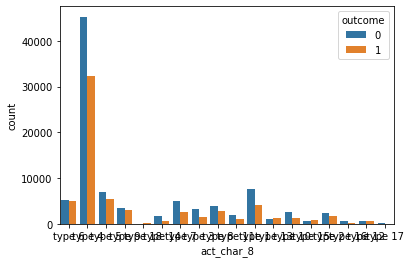

In [47]:
sns.countplot('act_char_8', data=ac_pl_merge, hue='outcome')

In [ ]:
ac_pl_merge.act_char_6.value_counts()

In [ ]:
# plt.stackplot('outcome','pl_char_38',data=ac_pl_merge)

In [ ]:
ac_pl_merge_0 = ac_pl_merge['outcome'] == 0
ac_pl_merge_1 = ac_pl_merge['outcome'] == 1
ac_pl_merge[ac_pl_merge_1].columns

In [52]:
stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['pl_char_38'], ac_pl_merge[ac_pl_merge_1]['pl_char_38'], equal_var=False)

Ttest_indResult(statistic=-1446.7458801234332, pvalue=0.0)

In [51]:
stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['pl_char_37'], ac_pl_merge[ac_pl_merge_1]['pl_char_37'], equal_var=False)

Ttest_indResult(statistic=-433.34072072117186, pvalue=0.0)

In [ ]:
# stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['activity_category'], ac_pl_merge[ac_pl_merge_1]['activity_category'], equal_var=False)

In [ ]:
stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['activity_category'], ac_pl_merge[ac_pl_merge_1]['activity_category'], equal_var=False)

In [ ]:
# ac_pl_merge_1 = ac_pl_merge['outcome'] == 1 & ac_pl_merge.act_date.dt.year


In [ ]:
ac_pl_merge_1_2022 = ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year == 2022
ac_pl_merge_1_2023 = ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year == 2023
# ac_pl_merge[ac_pl_merge_1_2022]

In [ ]:
ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year.value_counts()

In [ ]:
# ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year == 2022

In [ ]:
# ac_pl_merge[ac_pl_merge['outcome'] == 1]['act_date'].dt.year == 2023

In [53]:

# &  ac_pl_merge['outcome'] == 1
# ac_pl_merge_2023.shape

Ttest_indResult(statistic=2.59177386864287, pvalue=0.009548393792587564)

In [ ]:
ac_pl_merge.columns

In [ ]:
# sns.barplot(ac['date'].dt.year, 'people_id', data=ac, hue='outcome')

In [ ]:
ac.groupby(['outcome','activity_category'])['char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
#        'char_9', 'char_10'].count().plot(kind='bar', stacked=True)

In [ ]:
ac.activity_category.unique()

In [ ]:
ac.char_10.nunique()

In [ ]:
for i in ac:
    print('No. of Null', i,ac[i].isnull().sum())